In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import pickle

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d


# Preprocesado y modelado
# ==============================================================================
from sklearn.preprocessing import StandardScaler


#from sklearn import metrics
from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Calidad de los clusters
# ==============================================================================
from ds_utils.unsupervised import plot_cluster_cardinality, plot_cluster_magnitude, plot_magnitude_vs_cardinality
from scipy.spatial.distance import euclidean

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [62]:
train = pd.read_csv('data/train_enc_2.csv')

In [63]:
test = pd.read_csv('data/test_enc.csv')

In [64]:
train.drop(['Unnamed: 0'], axis=1, inplace=True)

In [65]:
train.head(5)

,carat,cut,color,clarity,depth,table,price
0,0.30,3,6,1,0.623981,58.0,6.353
1,1.01,4,5,5,0.627329,56.0,9.183
2,0.72,4,4,3,0.618341,59.0,7.983
3,1.08,2,3,1,0.631902,57.0,8.371
4,0.36,3,3,4,0.623204,59.0,6.588


In [66]:
test.head(5)

,carat,cut,color,clarity,depth,table
0,0.32,4,1,2,0.605381,58.0
1,1.24,3,1,2,0.629247,60.0
2,1.66,3,6,2,0.620462,59.0
3,0.75,3,6,1,0.606419,56.0
4,1.50,0,5,1,0.648161,55.0


In [67]:
train.reset_index(inplace=True)

In [68]:
test.reset_index(inplace=True)

In [69]:
train['index'].max()

40261

In [70]:
test['index'] = test['index'] + 40262

In [71]:
df_concat = pd.concat([train, test], ignore_index=True)

In [72]:
df_concat.tail(5)

,index,carat,cut,color,clarity,depth,table,price
53742,53742,1.10,3,3,2,0.595238,60.0,NaN
53743,53743,0.90,2,6,2,0.620746,60.0,NaN
53744,53744,0.30,4,4,3,0.621810,53.3,NaN
53745,53745,1.25,4,1,2,0.595745,59.0,NaN
53746,53746,0.81,3,4,2,0.616162,58.0,NaN


In [73]:
df_concat.drop('price', axis=1, inplace=True)

In [74]:
df_concat.set_index('index', inplace=True)

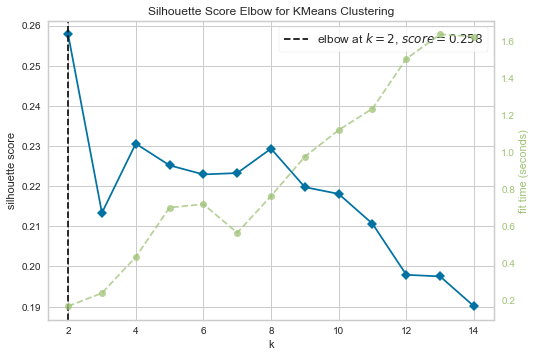

In [75]:
# iniciamos un modelo de Kmean
model = KMeans()

# llamamos al método KElbowVisualizer para que nos calcula el score de silhouette
visualizer = KElbowVisualizer(model, k=(2,15), metric='silhouette')

# fiteamos el modelo
visualizer.fit(df_concat)  

# visualizamos los resultados
visualizer.show();

In [99]:
#iniciamos el modelo
kmeans = KMeans(n_clusters=2)

#fitemos el modelo
km_fit = kmeans.fit(df_concat)

In [100]:
labels = km_fit.labels_
centroides = km_fit.cluster_centers_

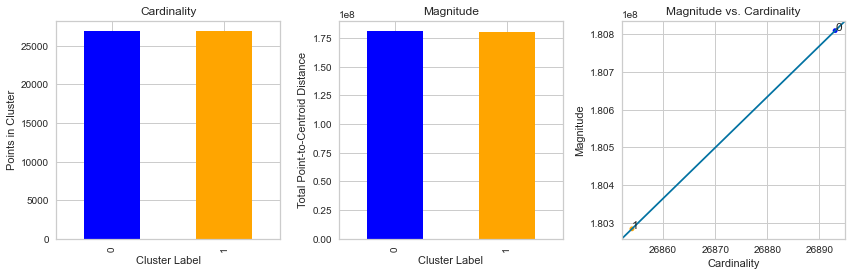

In [101]:
cluster_colors = ['blue', 'orange']

# iniciamos los subplots
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(12,4))

# ploteamos la CARDINALIDAD
plot_cluster_cardinality(labels, # las labels que predijo nuestro modelo
                         ax=ax1, # sobre que eje lo queremos hacer
                         title="Cardinality", # título de la gráfica
                         color=cluster_colors # colores que vamos a querer usar
                        )


# ploteamos la MAGNITUD
plot_cluster_magnitude(df_concat, # el dataframe del que sacaremos los datos
                       labels, # las labels que predijo nuestro modelo
                       centroides, # los centroides de nuestros clusters
                       euclidean, # la distancia que quiero usar para medir
                       ax=ax2,
                       title="Magnitude",
                       color=cluster_colors
                      )

# ploteamos la RELACIÓN ENTRE CARDINALIDAD Y MAGNITUD
plot_magnitude_vs_cardinality(df_concat,# el dataframe del que sacaremos los datos
                              labels, # las labels que predijo nuestro modelo
                              centroides, # los centroides de nuestros clusters
                              euclidean,# la distancia
                              color=cluster_colors,
                              ax=ax3,
                              title="Magnitude vs. Cardinality")
plt.tight_layout()
plt.show()

In [79]:
df_concat["Cluster"] = labels

In [80]:
df_concat.reset_index(inplace=True)

In [81]:
df_train = df_concat[df_concat['index'] <= 40261]

In [82]:
df_test = df_concat[df_concat['index'] >= 40262]

In [86]:
df_train['price'] = train['price']

In [88]:
df_train.drop('index', axis=1, inplace=True)

In [89]:
df_train_0 = df_train[df_train['Cluster'] == 0]

In [90]:
df_train_1 = df_train[df_train['Cluster'] == 1]

In [91]:
df_test['index'] = df_test['index'] - 40262

In [92]:
df_test.set_index('index', inplace=True)

In [93]:
df_test_0 = df_test[df_test['Cluster'] == 0]

In [94]:
df_test_1 = df_test[df_test['Cluster'] == 1]

In [95]:
def save_scaler(amount, filename = "scaler.pkl"): 
    with open(filename, "wb") as f:
        pickle.dump(amount, f)

save_scaler(km_fit, filename="km_fit.pkl")

In [96]:
df_train_0.drop("Cluster", axis=1, inplace=True)
df_train_1.drop("Cluster", axis=1, inplace=True)
df_test_0.drop("Cluster", axis=1, inplace=True)
df_test_1.drop("Cluster", axis=1, inplace=True)

In [97]:
df_train_0.to_csv("data/clusters/train_clustered_0.csv")
df_train_1.to_csv("data/clusters/train_clustered_1.csv")
df_test_0.to_csv("data/clusters/test_clustered_0.csv")
df_test_1.to_csv("data/clusters/test_clustered_1.csv")

In [37]:
df_train_0.describe()

,carat,cut,color,clarity,depth,table,price
count,17526.000000,17526.000000,17526.000000,17526.000000,17526.000000,17526.000000,17523.000000
mean,0.919969,2.314048,3.291224,2.567043,0.614871,59.429727,7.994041
std,0.501612,0.930923,1.752172,1.426321,0.017619,1.649277,1.007780
min,0.200000,0.000000,0.000000,0.000000,0.510226,56.000000,5.787000
25%,0.500000,2.000000,2.000000,1.000000,0.603814,58.000000,7.124000
50%,0.900000,3.000000,3.000000,2.000000,0.615984,59.000000,8.166000
75%,1.180000,3.000000,5.000000,3.000000,0.626059,60.000000,8.729000
max,4.000000,4.000000,6.000000,7.000000,0.787295,73.000000,9.841000


In [147]:
df_test_0.describe()

,carat,cut,color,clarity,depth,table
count,5882.000000,5882.000000,5882.000000,5882.000000,5882.000000,5882.000000
mean,0.909689,2.302448,3.296838,2.587045,0.615078,59.454675
std,0.495938,0.937509,1.745484,1.424154,0.018065,1.671011
min,0.200000,0.000000,0.000000,0.000000,0.524700,56.000000
25%,0.500000,2.000000,2.000000,2.000000,0.603645,58.000000
50%,0.900000,3.000000,3.000000,2.000000,0.616099,59.000000
75%,1.160000,3.000000,5.000000,3.000000,0.626004,60.000000
max,4.130000,4.000000,6.000000,7.000000,0.843305,73.000000
